In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-price/house_prices.csv


# **Import library and data**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv(r"/kaggle/input/house-price/house_prices.csv")
df.describe(include="all")
df.info()
df.shape
df.head(5).T
df.isnull().sum()

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187531 entries, 0 to 187530
Data columns (total 21 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Index              187531 non-null  int64  
 1   Title              187531 non-null  object 
 2   Description        184508 non-null  object 
 3   Amount(in rupees)  187531 non-null  object 
 4   Price (in rupees)  169866 non-null  float64
 5   location           187531 non-null  object 
 6   Carpet Area        106858 non-null  object 
 7   Status             186916 non-null  object 
 8   Floor              180454 non-null  object 
 9   Transaction        187448 non-null  object 
 10  Furnishing         184634 non-null  object 
 11  facing             117298 non-null  object 
 12  overlooking        106095 non-null  object 
 13  Society            77853 non-null   object 
 14  Bathroom           186703 non-null  object 
 15  Balcony            138596 non-null  object 
 16  Ca

Index                     0
Title                     0
Description            3023
Amount(in rupees)         0
Price (in rupees)     17665
location                  0
Carpet Area           80673
Status                  615
Floor                  7077
Transaction              83
Furnishing             2897
facing                70233
overlooking           81436
Society              109678
Bathroom                828
Balcony               48935
Car Parking          103357
Ownership             65517
Super Area           107685
Dimensions           187531
Plot Area            187531
dtype: int64

# **Visualize data**

/tmp/ipykernel_20/2196683790.py:22: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='jet')


<Axes: >

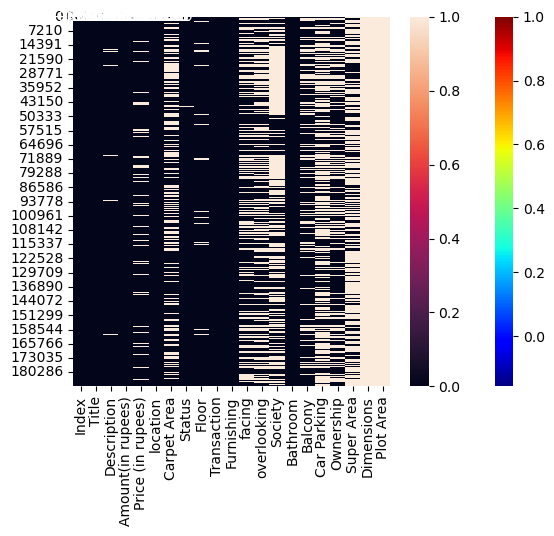

In [3]:
import re
df['Carpet Area'] = df['Carpet Area'].astype(str).apply(lambda x: re.sub(r'[^0-9.]', '', x)).replace('', float('nan')).astype(float)
df['Carpet Area']
df.Transaction.nunique()
df.dropna(subset=['Bathroom'], inplace=True)
df.Bathroom.isnull().sum()
df.Bathroom.value_counts()
def convertir_valor(valor):
    if '>' in valor:
        return int(valor.replace('>', ''))
    else:
        return int(valor)

# Aplicar la función a la columna 'Columna1'
df['Bathroom'] = df['Bathroom'].apply(convertir_valor)
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
df.location = le.fit_transform(df.location)
df.Furnishing = le.fit_transform(df.Furnishing)
df.Transaction = le.fit_transform(df.Transaction)
df.Bathroom = df.Bathroom.astype(int)
sns.heatmap(df.corr(), annot=True, cmap='jet')
sns.heatmap(df.isna())

# # **please vote if you liked the work. thanks!!**